In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

In [2]:
loan_df = pd.read_csv("train_ctrUa4K.csv")
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
loan_df.describe(include='object').T

,count,unique,top,freq
Loan_ID,614,614,LP001002,1
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


In [6]:
loan_df[['Property_Area']].value_counts()

Property_Area
Semiurban        233
Urban            202
Rural            179
dtype: int64

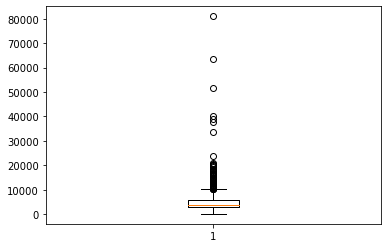

In [7]:
plt.boxplot(loan_df['ApplicantIncome']);

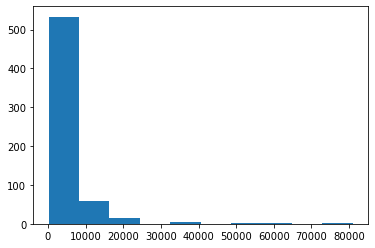

In [8]:
plt.hist(loan_df['ApplicantIncome']);

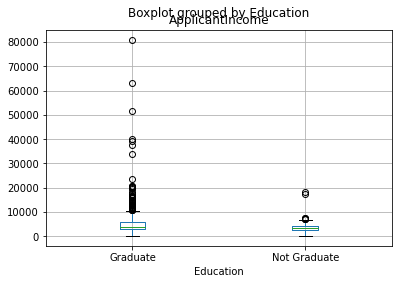

In [9]:
loan_df.boxplot(column='ApplicantIncome', by='Education');

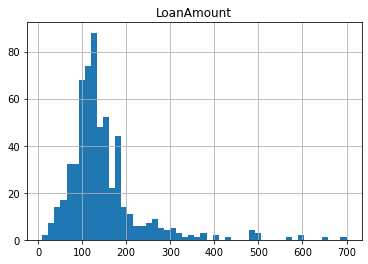

In [10]:
loan_df.hist('LoanAmount',bins=50);

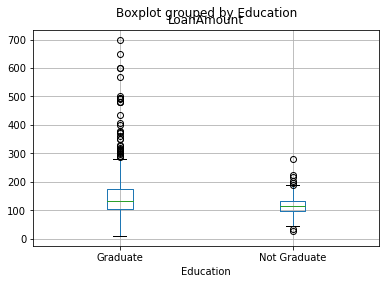

In [11]:
loan_df.boxplot('LoanAmount', by='Education');

<AxesSubplot:xlabel='Credit_History'>

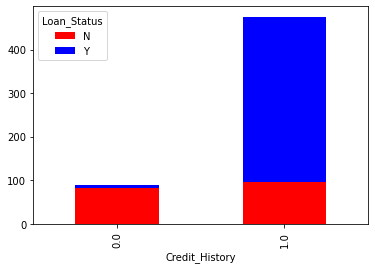

In [12]:
temp3 = pd.crosstab(loan_df['Credit_History'], loan_df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [13]:
temp1 = loan_df['Property_Area'].value_counts(ascending=True)
print(temp1)

temp2 = loan_df.pivot_table(values='Loan_Status', index='Property_Area', aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
print(temp2)

Rural        179
Urban        202
Semiurban    233
Name: Property_Area, dtype: int64
               Loan_Status
Property_Area             
Rural             0.614525
Semiurban         0.768240
Urban             0.658416


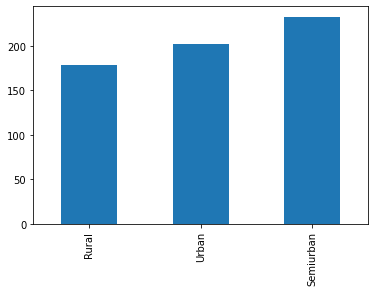

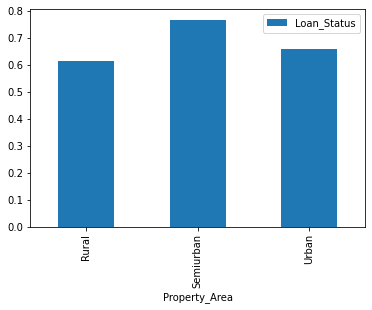

In [14]:

temp1.plot(kind='bar');

temp2.plot(kind='bar');

In [15]:
#checking the null value
loan_df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

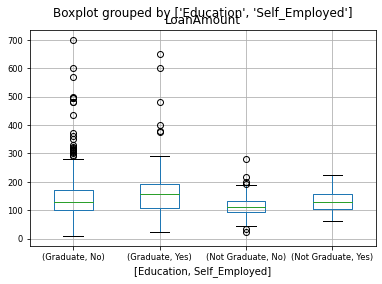

In [16]:
loan_df.boxplot(column='LoanAmount', by=['Education', 'Self_Employed'], fontsize='small');

In [17]:
loan_df['Self_Employed'].fillna('No', inplace=True)
loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].mean(), inplace=True)

In [18]:
# table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# # Define function to return value of this pivot_table
# def fage(x):
#     return table.loc[x['Self_Employed'],x['Education']]
# # Replace missing values
# df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [19]:
loan_df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

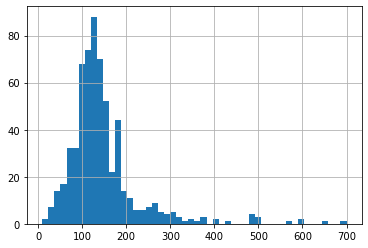

In [20]:
#loanamount distribution before apply log transformation
loan_df['LoanAmount'].hist(bins=50);


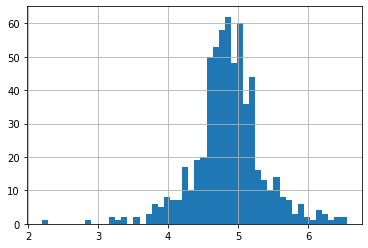

In [44]:
#aplly log transformation
loan_df['LoanAmount_log'] = np.log(loan_df['LoanAmount'])
loan_df['LoanAmount'].hist(bins=50);

<AxesSubplot:>

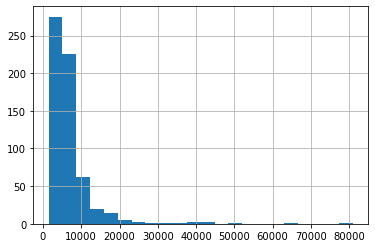

In [45]:
#combine applicant_income and co_applicant_income to total_income
loan_df['TotalIncome'] = loan_df['ApplicantIncome'] + loan_df['CoapplicantIncome']
loan_df['TotalIncome_log'] = np.log(loan_df['TotalIncome'])
loan_df['TotalIncome'].hist(bins=22)

In [46]:
loan_df[['Gender', 'Married', 'Dependents', 'Loan_Amount_Term', 'Credit_History']].apply(lambda x: sum(x.isnull()), axis=0)

Gender              0
Married             0
Dependents          0
Loan_Amount_Term    0
Credit_History      0
dtype: int64

In [47]:
loan_df['Gender'].fillna(loan_df['Gender'].mode()[0], inplace=True)
loan_df['Married'].fillna(loan_df['Married'].mode()[0], inplace=True)
loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0], inplace=True)
loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mode()[0], inplace=True)
loan_df['Credit_History'].fillna(loan_df['Credit_History'].mode()[0], inplace=True)

In [48]:
loan_df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
Pay_Loan_Rate        0
LoanAmount_log       0
TotalIncome_log      0
dtype: int64

In [49]:
loan_df['Pay_Loan_Rate'] = loan_df['LoanAmount']/loan_df['TotalIncome']
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Pay_Loan_Rate,LoanAmount_log,TotalIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,4.986426,360.0,1.0,2,1,5849.0,0.000853,1.606719,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,4.852030,360.0,1.0,0,0,6091.0,0.000797,1.579397,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,4.189655,360.0,1.0,2,1,3000.0,0.001397,1.432618,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,4.787492,360.0,1.0,2,1,4941.0,0.000969,1.566007,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,4.948760,360.0,1.0,2,1,6000.0,0.000825,1.599137,8.699515


In [27]:
#convert the categorical variable to label
le = LabelEncoder()
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for i in var_mod:
    loan_df[i] = le.fit_transform(loan_df[i])
loan_df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
TotalIncome          float64
Pay_Loan_Rate        float64
dtype: object

In [50]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Pay_Loan_Rate,LoanAmount_log,TotalIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,4.986426,360.0,1.0,2,1,5849.0,0.000853,1.606719,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,4.852030,360.0,1.0,0,0,6091.0,0.000797,1.579397,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,4.189655,360.0,1.0,2,1,3000.0,0.001397,1.432618,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,4.787492,360.0,1.0,2,1,4941.0,0.000969,1.566007,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,4.948760,360.0,1.0,2,1,6000.0,0.000825,1.599137,8.699515


In [29]:
def classification_model(model, data, x_train, y_train):
    #Fit the model with the training dataset
    model.fit(data[x_train], data[y_train])
    #Predict the model
    y_pred = model.predict(data[x_train])
    #Accuracy
    accuracy = metrics.accuracy_score(y_pred, data[y_train])
    print("Accuracy: %s" % "{0:.3%}".format(accuracy))
    

In [30]:
model = LogisticRegression()
x_train = ['Credit_History']
y_train = 'Loan_Status'
classification_model(model, loan_df, x_train, y_train)

Accuracy: 80.945%


In [41]:
def classification_model(model, data, predictor, outcome):
    #Fit the model with the training dataset
    model.fit(data[predictor], data[outcome])
    #Predict the model
    prediction = model.predict(data[predictor])
    #Accuracy
    accuracy = metrics.accuracy_score(prediction, data[outcome])
    print("Accuracy: %s" % "{0:.3%}".format(accuracy))
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    scalar = MinMaxScaler()

    # Defining the features and labels
    x = data[predictor].to_numpy()
    y = data[outcome].to_numpy()

    error = []
    
    for train_index, test_index in kf.split(x, y):
        # Splitting the data into training and testing sets
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        #Scale the input
        scalar.fit(x_train)
        x_train = scalar.transform(x_train)
        x_test = scalar.transform(x_test)

        # Fitting the model
        model.fit(x_train, y_train)

        # Calculating accuracy
        error.append(model.score(x_test, y_test))

    print("Cross-Validation Score: %s" % "{0:.3%}".format(np.mean(error)))
    model.fit(data[predictor], data[outcome])

In [42]:
model = LogisticRegression()
predictor = ['Credit_History']
outcome = 'Loan_Status'
classification_model(model, loan_df, predictor, outcome)

Accuracy: 80.945%
Cross-Validation Score: 80.946%


In [51]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education', 'LoanAmount_log']
classification_model(model, loan_df, predictor_var, outcome)

Accuracy: 93.322%
Cross-Validation Score: 67.266%


In [55]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, loan_df, predictor_var, outcome)

Accuracy: 100.000%
Cross-Validation Score: 79.158%


In [56]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Credit_History      0.274016
TotalIncome_log     0.260726
LoanAmount_log      0.221240
Dependents          0.055544
Property_Area       0.050831
Loan_Amount_Term    0.043463
Education           0.026620
Married             0.026272
Self_Employed       0.020934
Gender              0.020355
dtype: float64


In [59]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model,loan_df,predictor_var,outcome)

Accuracy: 82.736%
Cross-Validation Score: 80.785%
